In [ ]:
 # Naive Bayes Filter
* 베이즈 정리를 기반으로 작성된 분류기
A:입력 데이터, B: 카테고리(스팸/햄)
=> P(스팸|나이트)

P(B|A)=P(A|B)*P(B)/P(A)에서 P(A)는 공통이므로 비교할 때, 생략해도 무관하다
A가 단어들의 집합이라면,
P(A|B)=P(a1|B)P(a2|B)P(a3|B)...P(aN|B)
P(aN|B)는 단어가 카테고리에 속할 확률
따라서, P(A|B)*P(B)를 카테고리별로 계산하면 된다

P(정상 메일 | 입력 텍스트) = P(you | 정상 메일) × P(free | 정상 메일) × P(lottery | 정상 메일)
P(스팸 메일 | 입력 텍스트) = P(you | 스팸 메일) × P(free | 스팸 메일) × P(lottery | 스팸 메일)

P(you | 정상 메일)을 구하는 방법은 정상 메일에 등장한 모든 단어의 빈도 수의 총합을 분모로하고, 정상 메일에서 you가 총 등장한 빈도의 수를 분자로 하는 것입니다. 이 경우에는 2/10 = 0.2가 됩니다. 

In [30]:
class BayesianlFilter: # 붕어빵 기계
    def __init__(self): # 초기화 작업을 해준다 (self=만들어질 객체를 나타내는 대명사, 붕어빵)
        self.words=set() # self.word --> 붕어빵.길이(약10센치) set객체 
        self.word_dict={} # 카테고리 (광고/중요) 단어 빈도수 
        self.category_dict={}
        
    def split(self,text): # 어미, 조사, 구두점 제외, 형태소 분석
        okt=Okt()
        result=[]
        malist=okt.pos(text,norm=True,stem=True) #기본적으로 노름과 스템은 true값을 준다
#         print(malist)
        for word in malist:
            if not word[1] in ["Josa","Eomi","Punctuation"]:
                result.append(word[0])
#         print(result)
        return result
#             print(word[1]) # word의 [1]에는 형태소 카테고리가 들어있다.

    def inc_word(self,word,category): # 파격 ,광고
        # 단어를 카테고리에 추가
        if not category in self.word_dict:  # 카테고리 단어가 저장된 dict
            self.word_dict[category]={} # 카테고리라는 키값에 딕셔너리 형태로 단어가 들어간다 # {'광고':{}}
        if not word in self.word_dict[category]: # 해당카테고리에 그 단어가 존재하지 않는다면, 
            self.word_dict[category][word]=0 # {'광고':{'파격':0}}
        self.word_dict[category][word]+=1 # {'광고':{'파격':1}}
        self.words.add(word) #{'파격'} word는 set이라는 객체기때문에 단어가 중복되어 들어가지 않는다.
        
    def inc_category(self,category):
        if not category in self.category_dict:
            self.category_dict[category]=0
        self.category_dict[category]+=1
        
    def predict(self,text):
        # text에서 전달받은 단어를 정제한다 --> 조사,어미,기호 뺀 나머지 저장
        predic_word=self.split(text)
        # P(광고|재고정리할인배송)과 P(중요|재고정리할인배송) 중 큰 값을 return 한다.
        # P(재고정리할인배송가 광고)와 P(재고정리할인배송가 중요)를 비교한다.
        
#         print(predic_word) # --> 잘 전달되었는지 먼저 확인
#         num_cat=len(self.inc_category(category)) # --> 전체 카테고리 수 확인
#         self.word_dict[category]
        print(self.word_dict)
        cat_perc=[]
        for category in self.category_dict.keys(): # 카테고리 하나씩 비교
            perc_mul=1
            for word in predic_word :# 해당 카테고리에서 입력한 단어 하나씩 비교
    #             pass
                if word in self.word_dict[category].keys():
                    perc_mul*=(self.word_dict[category][word]+1)/(sum(self.word_dict[category].values())+len(self.words))
                    print(self.word_dict[category][word],word)
                    print(sum(self.word_dict[category].values()))
                    # self.word_dict[category][word] : 해당 카테고리의 딕셔너리의 key값(=word)빈도수
                    # self.word_dict[category].values() : 모든 단어의 빈도수 총합 
                
                else:
#                   self.word_dict[category][word]=1
                    perc_mul*=1/(sum(self.word_dict[category].values())+len(self.words))
            #   P(광고)= 해당 카테고리 빈도수/ 전체 카테고리 빈도수
            prob_cat=self.category_dict[category]/sum(self.category_dict.values())
            print(prob_cat)
            fin_prob=perc_mul*prob_cat # 입력데이터가 해당카테고리일 확률(최종 결과물)
            cat_perc.append((category,fin_prob)) 
            cat_perc.sort(key=lambda x : x[1], reverse=True)
            print(cat_perc)
            
#             if cat_perc > max_prob:
#                 max_prob=cat_perc
                
        return cat_perc[0][0], cat_perc[0][1]
#         print(cat_perc) # 카테고리 및 확률 저장 리스트를 출력

#             for  in len(word_dict[category]):
#                 mul = word_dict[category][word]/word_dict[category]
#                 perc_mul *= mul
#             print(perc_mul)

        
#         if category in self.word_dict
        
#         for word in text:
#             if word in self.word_dict[category][word]:
                
#         카테고리별로 단어의 빈도수를 비교한다.
#         빈도수가 높은 카테고리를 리턴한다.
        
    def fit(self,text,category):
        word_list=self.split(text)
        for word in word_list:
            self.inc_word(word,category)
        self.inc_category(category)
        print("word list:", word_list)

In [2]:
from konlpy.tag import Okt

In [33]:
bf=BayesianlFilter() # 붕어빵 기계에서 붕어빵 1개 만들어주렴
bf.fit("파격 세일 - 오늘까지만 50% 할인", "광고")
bf.fit("쿠폰 선물 & 무료 배송", "광고")
bf.fit("현데계 백화점 세일", "광고")
bf.fit("봄과 함께 찾아온 따뜻한 신제품 소식", "광고")
bf.fit("인기 제품 기간 한정 세일", "광고")
bf.fit("오늘 일정 확인", "중요")
bf.fit("프로젝트 진행 상황 보고","중요")
bf.fit("계약 잘 부탁드립니다","중요")
bf.fit("회의 일정이 등록되었습니다.","중요")
bf.fit("오늘 일정이 없습니다.","중요")
# bf.predict("재고 정리 할인, 배송")
res, scorelist=bf.predict("재고 정리 할인, 배송")
print("결과:",res) # 중요 / 광고
print(scorelist) # 중요 메일 / 광고메일

res, scorelist=bf.predict("오늘 멀티캠에서 회의는 어땠습니까?")
print("결과:", res) #중요 or 광고
print(scorelist)#중요메일/광고메일 베이지안 필터기 각 확률


word list: ['파격', '세', '일', '오늘', '50%', '할인']
word list: ['쿠폰', '선물', '무료', '배송']
word list: ['현', '데', '계', '백화점', '세', '일']
word list: ['봄', '함께', '찾아오다', '따뜻하다', '신제품', '소식']
word list: ['인기', '제품', '기간', '한정', '세', '일']
word list: ['오늘', '일정', '확인']
word list: ['프로젝트', '진행', '상황', '보고']
word list: ['계약', '자다', '부탁드리다']
word list: ['회의', '일정', '등록', '되어다']
word list: ['오늘', '일정', '없다']
{'광고': {'파격': 1, '세': 3, '일': 3, '오늘': 1, '50%': 1, '할인': 1, '쿠폰': 1, '선물': 1, '무료': 1, '배송': 1, '현': 1, '데': 1, '계': 1, '백화점': 1, '봄': 1, '함께': 1, '찾아오다': 1, '따뜻하다': 1, '신제품': 1, '소식': 1, '인기': 1, '제품': 1, '기간': 1, '한정': 1}, '중요': {'오늘': 2, '일정': 3, '확인': 1, '프로젝트': 1, '진행': 1, '상황': 1, '보고': 1, '계약': 1, '자다': 1, '부탁드리다': 1, '회의': 1, '등록': 1, '되어다': 1, '없다': 1}}
1 할인
28
1 배송
28
0.5
[('광고', 1.9073486328125e-06)]
0.5
[('중요', 2.5709452337246306e-06), ('광고', 1.9073486328125e-06)]
결과: 중요
2.5709452337246306e-06
{'광고': {'파격': 1, '세': 3, '일': 3, '오늘': 1, '50%': 1, '할인': 1, '쿠폰': 1, '선물': 1, '무료': 1, '배송': 1

# keras 

In [20]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
import numpy as np

Using TensorFlow backend.


In [27]:
x=np.array([1,2,3,4,5,6,7,8,9]) # 공부시간
y=np.array([12,23,31,45,55,67,72,88,94]) # 점수

# 7.5시간 공부했을 때, 점수는?
model=Sequential()
model.add(Dense(1,input_dim=1,activation='linear'))
sgd=optimizers.SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mse',metrics=['mse']) # mse:평균제곱
model.fit(x,y,batch_size=1,epochs=200,shuffle=False)

W0812 16:05:20.807980  7512 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0812 16:05:20.895951  7512 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0812 16:05:20.905953  7512 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Epoch 1/200
9/9 [==============================] - 0s 25ms/step - loss: 370.9627 - mean_squared_error: 370.9627
Epoch 2/200
9/9 [==============================] - 0s 1ms/step - loss: 15.0911 - mean_squared_error: 15.0911
Epoch 3/200
9/9 [==============================] - 0s 1000us/step - loss: 15.0783 - mean_squared_error: 15.0783
Epoch 4/200
9/9 [==============================] - 0s 1ms/step - loss: 15.0679 - mean_squared_error: 15.0679
Epoch 5/200
9/9 [==============================] - 0s 1000us/step - loss: 15.0599 - mean_squared_error: 15.0599
Epoch 6/200
9/9 [==============================] - 0s 889us/step - loss: 15.0539 - mean_squared_error: 15.0539
Epoch 7/200
9/9 [==============================] - 0s 777us/step - loss: 15.0499 - mean_squared_error: 15.0499
Epoch 8/200
9/9 [==============================] - 0s 1ms/step - loss: 15.0475 - mean_squared_error: 15.0475
Epoch 9/200
9/9 [==============================] - 0s 1ms/step - loss: 15.0467 - mean_squared_error: 15.0467
Epoch 

9/9 [==============================] - 0s 779us/step - loss: 15.6646 - mean_squared_error: 15.6646
Epoch 148/200
9/9 [==============================] - 0s 1000us/step - loss: 15.6650 - mean_squared_error: 15.6650
Epoch 149/200
9/9 [==============================] - 0s 889us/step - loss: 15.6654 - mean_squared_error: 15.6654
Epoch 150/200
9/9 [==============================] - 0s 889us/step - loss: 15.6658 - mean_squared_error: 15.6658
Epoch 151/200
9/9 [==============================] - 0s 887us/step - loss: 15.6661 - mean_squared_error: 15.6661
Epoch 152/200
9/9 [==============================] - 0s 889us/step - loss: 15.6665 - mean_squared_error: 15.6665
Epoch 153/200
9/9 [==============================] - 0s 888us/step - loss: 15.6668 - mean_squared_error: 15.6668
Epoch 154/200
9/9 [==============================] - 0s 889us/step - loss: 15.6672 - mean_squared_error: 15.6672
Epoch 155/200
9/9 [==============================] - 0s 778us/step - loss: 15.6675 - mean_squared_error: 15.6

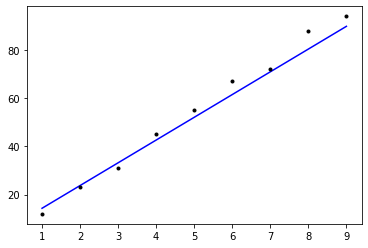

In [29]:
import matplotlib.pylab as plt
plt.plot(x,model.predict(x),'b',x,y,'k.')# 'k.'은 x,y를 검정색 점으로 찍어라

In [32]:
print(model.predict([7.5]))

[[75.66547]]


In [ ]:
# 로지스틱 회귀

In [36]:
x=np.array([1,2,3,4,5,6,7,8,9]) #공부시간
y=np.array([0,0,0,0,0,1,1,1,1]) #합격여부
# 7.5 시간 공부? 점수?
model=Sequential()
model.add(Dense(1,input_dim=1, activation='sigmoid'))
sgd=optimizers.SGD(lr=0.01)
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['binary_accuracy'])
model.fit(x,y, batch_size=1, epochs=300, shuffle=False)

Epoch 1/300
9/9 [==============================] - 0s 21ms/step - loss: 2.6470 - binary_accuracy: 0.4444
Epoch 2/300
9/9 [==============================] - 0s 1ms/step - loss: 2.3826 - binary_accuracy: 0.4444
Epoch 3/300
9/9 [==============================] - 0s 2ms/step - loss: 2.1220 - binary_accuracy: 0.4444
Epoch 4/300
9/9 [==============================] - 0s 1ms/step - loss: 1.8669 - binary_accuracy: 0.4444
Epoch 5/300
9/9 [==============================] - 0s 1ms/step - loss: 1.6195 - binary_accuracy: 0.4444
Epoch 6/300
9/9 [==============================] - 0s 1ms/step - loss: 1.3834 - binary_accuracy: 0.4444
Epoch 7/300
9/9 [==============================] - 0s 1ms/step - loss: 1.1647 - binary_accuracy: 0.4444
Epoch 8/300
9/9 [==============================] - 0s 1000us/step - loss: 0.9723 - binary_accuracy: 0.4444
Epoch 9/300
9/9 [==============================] - 0s 889us/step - loss: 0.8175 - binary_accuracy: 0.4444
Epoch 10/300
9/9 [==============================] - 0s 1ms

9/9 [==============================] - 0s 999us/step - loss: 0.3752 - binary_accuracy: 0.8889
Epoch 155/300
9/9 [==============================] - 0s 1ms/step - loss: 0.3743 - binary_accuracy: 0.8889
Epoch 156/300
9/9 [==============================] - 0s 1ms/step - loss: 0.3735 - binary_accuracy: 0.8889
Epoch 157/300
9/9 [==============================] - 0s 888us/step - loss: 0.3726 - binary_accuracy: 0.8889
Epoch 158/300
9/9 [==============================] - 0s 1ms/step - loss: 0.3718 - binary_accuracy: 0.8889
Epoch 159/300
9/9 [==============================] - 0s 1ms/step - loss: 0.3710 - binary_accuracy: 0.8889
Epoch 160/300
9/9 [==============================] - 0s 1ms/step - loss: 0.3702 - binary_accuracy: 0.8889
Epoch 161/300
9/9 [==============================] - 0s 1ms/step - loss: 0.3694 - binary_accuracy: 0.8889
Epoch 162/300
9/9 [==============================] - 0s 1ms/step - loss: 0.3686 - binary_accuracy: 0.8889
Epoch 163/300
9/9 [==============================] - 0s 

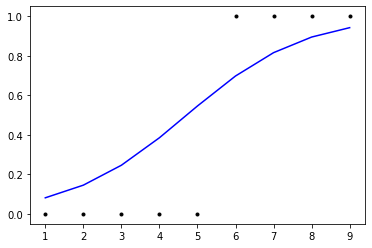

In [37]:
plt.plot(x,model.predict(x),'b',x,y,'k.')# 'k.'은 x,y를 검정색 점으로 찍어라

In [38]:
print(model.predict([15,17]))

[[0.99877256]
 [0.99966633]]


In [41]:
# hx=w1x1+w2x2+w3x3+b

x=np.array([[100,92,83],[54,45,66],[79,89,90]]) # 공부시간
y=np.array([72,88,94]) # 점수

# 7.5시간 공부했을 때, 점수는?
model=Sequential()
model.add(Dense(1,input_dim=3,activation='linear'))
sgd=optimizers.SGD(lr=0.00001)
model.compile(optimizer=sgd,loss='mse',metrics=['mse']) # mse:평균제곱
model.fit(x,y,batch_size=1,epochs=300,shuffle=False)

Epoch 1/300
3/3 [==============================] - 0s 74ms/step - loss: 3032.7254 - mean_squared_error: 3032.7254
Epoch 2/300
3/3 [==============================] - 0s 2ms/step - loss: 726.4285 - mean_squared_error: 726.4285
Epoch 3/300
3/3 [==============================] - 0s 2ms/step - loss: 516.1752 - mean_squared_error: 516.1752
Epoch 4/300
3/3 [==============================] - 0s 2ms/step - loss: 479.3478 - mean_squared_error: 479.3478
Epoch 5/300
3/3 [==============================] - 0s 2ms/step - loss: 466.4202 - mean_squared_error: 466.4202
Epoch 6/300
3/3 [==============================] - 0s 1ms/step - loss: 458.1587 - mean_squared_error: 458.1587
Epoch 7/300
3/3 [==============================] - 0s 2ms/step - loss: 450.9825 - mean_squared_error: 450.9825
Epoch 8/300
3/3 [==============================] - 0s 2ms/step - loss: 444.1273 - mean_squared_error: 444.1273
Epoch 9/300
3/3 [==============================] - 0s 1ms/step - loss: 437.4230 - mean_squared_error: 437.423

3/3 [==============================] - 0s 2ms/step - loss: 55.3131 - mean_squared_error: 55.3131
Epoch 147/300
3/3 [==============================] - 0s 2ms/step - loss: 54.4931 - mean_squared_error: 54.4931
Epoch 148/300
3/3 [==============================] - 0s 2ms/step - loss: 53.6855 - mean_squared_error: 53.6855
Epoch 149/300
3/3 [==============================] - 0s 1ms/step - loss: 52.8899 - mean_squared_error: 52.8899
Epoch 150/300
3/3 [==============================] - 0s 1ms/step - loss: 52.1064 - mean_squared_error: 52.1064
Epoch 151/300
3/3 [==============================] - 0s 1ms/step - loss: 51.3347 - mean_squared_error: 51.3347
Epoch 152/300
3/3 [==============================] - 0s 1ms/step - loss: 50.5746 - mean_squared_error: 50.5746
Epoch 153/300
3/3 [==============================] - 0s 2ms/step - loss: 49.8259 - mean_squared_error: 49.8259
Epoch 154/300
3/3 [==============================] - 0s 1ms/step - loss: 49.0887 - mean_squared_error: 49.0887
Epoch 155/300
3

3/3 [==============================] - 0s 1ms/step - loss: 6.6979 - mean_squared_error: 6.6979
Epoch 293/300
3/3 [==============================] - 0s 1ms/step - loss: 6.6067 - mean_squared_error: 6.6067
Epoch 294/300
3/3 [==============================] - 0s 2ms/step - loss: 6.5168 - mean_squared_error: 6.5168
Epoch 295/300
3/3 [==============================] - 0s 1ms/step - loss: 6.4284 - mean_squared_error: 6.4284
Epoch 296/300
3/3 [==============================] - 0s 1ms/step - loss: 6.3412 - mean_squared_error: 6.3412
Epoch 297/300
3/3 [==============================] - 0s 2ms/step - loss: 6.2552 - mean_squared_error: 6.2552
Epoch 298/300
3/3 [==============================] - 0s 1ms/step - loss: 6.1705 - mean_squared_error: 6.1705
Epoch 299/300
3/3 [==============================] - 0s 1ms/step - loss: 6.0871 - mean_squared_error: 6.0871
Epoch 300/300
3/3 [==============================] - 0s 1ms/step - loss: 6.0049 - mean_squared_error: 6.0049


In [44]:
model.predict(x)

array([[75.13939 ],
       [87.335976],
       [92.713036]], dtype=float32)

In [45]:
# 다중 회귀 분석

x=np.array([[0,0],[0,1],[1,0],[1,1]]) # 공부시간
y=np.array([0,1,1,1]) # 점수

# 7.5시간 공부했을 때, 점수는?
model=Sequential()
model.add(Dense(1,input_dim=2,activation='linear'))
sgd=optimizers.SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mse',metrics=['mse']) # mse:평균제곱
model.fit(x,y,batch_size=1,epochs=300,shuffle=False)

Epoch 1/300
4/4 [==============================] - 0s 38ms/step - loss: 1.1166 - mean_squared_error: 1.1166   
Epoch 2/300
4/4 [==============================] - 0s 1000us/step - loss: 0.8887 - mean_squared_error: 0.8887
Epoch 3/300
4/4 [==============================] - 0s 2ms/step - loss: 0.7129 - mean_squared_error: 0.7129
Epoch 4/300
4/4 [==============================] - 0s 1ms/step - loss: 0.5772 - mean_squared_error: 0.5772
Epoch 5/300
4/4 [==============================] - 0s 1ms/step - loss: 0.4724 - mean_squared_error: 0.4724
Epoch 6/300
4/4 [==============================] - 0s 2ms/step - loss: 0.3914 - mean_squared_error: 0.3914
Epoch 7/300
4/4 [==============================] - 0s 1ms/step - loss: 0.3286 - mean_squared_error: 0.3286
Epoch 8/300
4/4 [==============================] - 0s 1ms/step - loss: 0.2800 - mean_squared_error: 0.2800
Epoch 9/300
4/4 [==============================] - 0s 1ms/step - loss: 0.2423 - mean_squared_error: 0.2423
Epoch 10/300
4/4 [============

4/4 [==============================] - 0s 1ms/step - loss: 0.0664 - mean_squared_error: 0.0664
Epoch 152/300
4/4 [==============================] - 0s 1ms/step - loss: 0.0663 - mean_squared_error: 0.0663
Epoch 153/300
4/4 [==============================] - 0s 1000us/step - loss: 0.0663 - mean_squared_error: 0.0663
Epoch 154/300
4/4 [==============================] - 0s 2ms/step - loss: 0.0663 - mean_squared_error: 0.0663
Epoch 155/300
4/4 [==============================] - 0s 1ms/step - loss: 0.0663 - mean_squared_error: 0.0663
Epoch 156/300
4/4 [==============================] - 0s 1ms/step - loss: 0.0662 - mean_squared_error: 0.0662
Epoch 157/300
4/4 [==============================] - 0s 1ms/step - loss: 0.0662 - mean_squared_error: 0.0662
Epoch 158/300
4/4 [==============================] - 0s 1ms/step - loss: 0.0662 - mean_squared_error: 0.0662
Epoch 159/300
4/4 [==============================] - 0s 1ms/step - loss: 0.0661 - mean_squared_error: 0.0661
Epoch 160/300
4/4 [===========

In [ ]:
# 소프트맥스 분류

In [ ]:
import pandas as pd
data=pd.read_csv("iris.csv")